In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [87]:
df=pd.read_csv("hp.csv" ,index_col=0 )

In [88]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageFinishnan,GarageQualnan,GarageCondnan,PoolQCnan,Fencenan,MiscFeaturenan,YearBuilt,YearRemodAdd,GarageYrBlt,SalePrice
0,0.235294,0.75,0.150685,0.033420,1.0,0.5,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,5,5,5.0,208500
1,0.000000,0.75,0.202055,0.038795,1.0,0.5,1.0,1.0,0.0,0.5,...,0.0,0.0,0.0,1.0,1.0,1.0,31,31,31.0,181500
2,0.235294,0.75,0.160959,0.046507,1.0,0.5,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,7,6,7.0,223500
3,0.294118,0.75,0.133562,0.038561,1.0,0.5,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,91,36,8.0,140000
4,0.235294,0.75,0.215753,0.060576,1.0,0.5,0.0,1.0,0.0,0.5,...,0.0,0.0,0.0,1.0,1.0,1.0,8,8,8.0,250000


In [89]:
x=df.drop(columns='SalePrice')     
y=df['SalePrice']

In [90]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.675264
GrLivArea       0.574888
TotalBsmtSF     0.548023
GarageCars      0.547558
                  ...   
YearRemodAdd   -0.404884
YearBuilt      -0.411671
BsmtQual       -0.532941
KitchenQual    -0.545531
ExterQual      -0.587905
Name: SalePrice, Length: 95, dtype: float64

In [91]:
no_feat=len(df.columns)
print("The no of feature is {}".format(no_feat))

The no of feature is 95


In [92]:
corr_feat=df.corr()['SalePrice']
corr_feat[corr_feat > 0.5]

OverallQual    0.675264
TotalBsmtSF    0.548023
1stFlrSF       0.501095
GrLivArea      0.574888
GarageCars     0.547558
GarageArea     0.544397
SalePrice      1.000000
Name: SalePrice, dtype: float64

In [93]:
feat=[i for i in corr_feat.index if corr_feat[i]>0.5 or corr_feat[i]<-0.5]

In [94]:
feat

['OverallQual',
 'ExterQual',
 'BsmtQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'KitchenQual',
 'GarageCars',
 'GarageArea',
 'SalePrice']

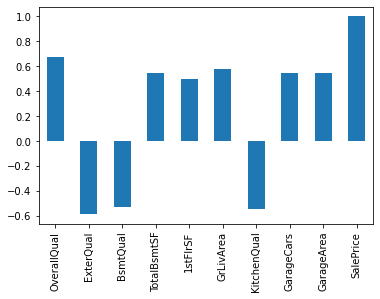

In [108]:
featr=pd.Series(corr_feat[feat] ,index=feat).plot(kind='bar')

In [95]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
ft=etr.fit(x,y)

In [96]:
etr.feature_importances_

array([2.28282908e-03, 2.72472673e-03, 8.12905074e-03, 8.29046524e-03,
       3.21788777e-05, 2.13165144e-04, 5.09941562e-03, 1.13254941e-02,
       8.63516030e-07, 2.59555850e-03, 4.05373022e-03, 8.86005895e-03,
       2.56829466e-03, 1.15881375e-03, 7.58993827e-04, 2.61100573e-03,
       1.38900568e-01, 5.85646835e-03, 9.17770111e-03, 5.72625015e-04,
       4.68961439e-03, 2.76836327e-03, 2.48562100e-03, 1.61102828e-02,
       7.38214278e-02, 9.51731355e-04, 1.06406980e-03, 9.68652592e-02,
       8.86828990e-04, 6.67894842e-03, 3.68113396e-03, 1.89774714e-02,
       2.67110068e-04, 5.25418356e-04, 8.34955462e-03, 3.78917053e-02,
       2.15412337e-03, 1.30438749e-03, 1.95561834e-03, 1.44423996e-04,
       2.60115589e-02, 8.67049401e-03, 8.76354412e-04, 6.71667656e-02,
       5.64708213e-03, 5.70408247e-04, 1.07345869e-02, 1.11024841e-02,
       9.89607956e-03, 4.76780521e-04, 4.96945793e-02, 1.13291732e-02,
       4.57301402e-04, 8.05072191e-03, 3.93568572e-03, 9.72689581e-03,
      

<AxesSubplot:>

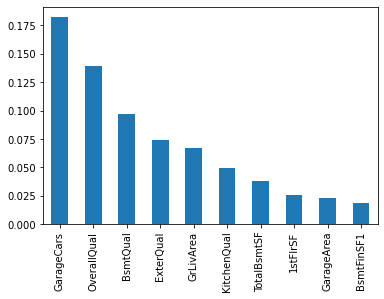

In [105]:
features=pd.Series(etr.feature_importances_ , index=x.columns).sort_values(ascending=False)
features.head(10).plot(kind='bar')

In [106]:
features.head(10).index

Index(['GarageCars', 'OverallQual', 'BsmtQual', 'ExterQual', 'GrLivArea',
       'KitchenQual', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'BsmtFinSF1'],
      dtype='object')

In [109]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
sel=SelectKBest(chi2)
# sel.fit(x,y) #error due to x having non negative

In [121]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.feature_selection import SelectFromModel

In [122]:
sm_lasso=SelectFromModel(Lasso())
sm_lasso.fit(x,y)
sm_lasso.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True])

In [123]:
sm_linear=SelectFromModel(LinearRegression())
sm_linear.fit(x,y)
sm_linear.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False])

In [124]:
sm_grad=SelectFromModel(SGDRegressor(alpha=0.005))
sm_grad.fit(x,y)
sm_grad.get_support()

array([False,  True, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True,  True, False, False,  True, False,  True, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True,  True,  True, False, False,  True, False,  True,
        True, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False,  True, False,  True, False, False,  True, False,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True])

In [128]:
feat_grad=pd.Series(sm_grad.get_support(),index=x.columns)
grf=feat_grad[feat_grad==True].index.tolist()
grf

['MSZoning',
 'LotShape',
 'LandContour',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrArea',
 'ExterCond',
 'BsmtQual',
 'BsmtFinSF2',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageCond',
 'PavedDrive',
 'EnclosedPorch',
 'ScreenPorch',
 'Fence',
 'MiscVal',
 'SaleType',
 'SaleCondition',
 'Alleynan',
 'BsmtQualnan',
 'BsmtCondnan',
 'BsmtExposurenan',
 'BsmtFinType1nan',
 'Fencenan',
 'MiscFeaturenan',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt']

In [145]:
feat_lasso=pd.Series(sm_lasso.get_support(),index=x.columns)
lsf=feat_grad[feat_lasso==True].index.tolist()
lsf

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'Po

In [177]:
from sklearn.model_selection import cross_val_score

In [195]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [208]:
cross_val_score(Lasso(alpha=0.1,max_iter=20000),x.loc[:,lsf],y,cv=5,scoring="r2").mean()

0.6193307376615182

In [202]:
cross_val_score((),x.loc[:,features.head(10).index],y,cv=5,scoring="r2").mean()

0.6222069210739702

In [204]:
cross_val_score(SGDRegressor(),x.loc[:,grf],y,cv=5,scoring="r2").mean()

-521661348415015.1

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size=0.3,random_state=0)

In [220]:
lr=Lasso(alpha=0.1,la)
lr.fit(x_train,y_train)

Lasso(alpha=0.1)

In [221]:
y_predict=lr.predict(x_test)

In [222]:
r2_score(y_test,y_predict)

0.5647621033560205

In [223]:
from sklearn.decomposition import PCA 

In [272]:
ft=PCA(n_components=28)
ft.fit(x)

PCA(n_components=28)

In [273]:
x_new=ft.transform(x)

In [274]:
xnew_df=pd.DataFrame(x_new)
xnew_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-43.654089,0.883670,0.065769,-0.672080,-0.036080,-0.433390,-0.025327,0.145912,-0.041463,-0.210543,...,-0.196667,0.179584,0.100911,0.068614,0.468977,0.135995,-0.012114,0.013377,0.036443,-0.067711
1,0.052004,-9.789066,-1.815480,0.406226,-0.098991,-0.060362,0.324380,-0.455499,-0.171496,0.080734,...,0.358699,-0.143006,-0.274014,-0.257147,-0.321222,0.390572,-0.091433,0.136967,0.085648,0.038431
2,-40.692424,0.934149,-0.373917,0.468204,-0.012662,0.076543,-0.080525,0.192813,0.101056,-0.409442,...,-0.063528,0.318568,0.075780,0.267128,-0.028760,-0.029240,0.060528,0.106144,-0.093131,0.020195
3,33.340083,15.621472,47.177725,1.366394,-0.780135,-0.054945,-0.419770,-0.208834,0.491199,-0.229261,...,-0.394527,0.097997,0.300598,0.150535,0.289475,-0.195821,-0.289406,-0.234871,0.728560,0.499539
4,-38.621865,-0.348674,-0.159570,0.767742,-0.088154,0.284350,-0.185340,-0.198122,0.387554,-0.035055,...,0.144492,0.433632,-0.038020,0.098919,-0.369458,-0.086874,0.057671,0.002372,-0.126108,-0.078412


In [275]:
x_train1,x_test1,y_train1,y_test1=train_test_split(xnew_df,y ,test_size=0.3,random_state=0)
lr1=Lasso(alpha=0.1)
lr1.fit(x_train1,y_train1)
y_predict1=lr1.predict(x_test1)

In [276]:
r2_score(y_test1,y_predict1)

0.6186865782956377

In [299]:
scr= []
for i in range (1,93):
    ft=PCA(n_components=i)
    ft.fit(x)
    x_new=ft.transform(x)
    xnew_df=pd.DataFrame(x_new)
    x_train1,x_test1,y_train1,y_test1=train_test_split(xnew_df,y ,test_size=0.3,random_state=0)
    lr1=Lasso(alpha=0.1,max_iter=20000)
    lr1.fit(x_train1,y_train1)
    y_predict1=lr1.predict(x_test1)
    r2=r2_score(y_test1,y_predict1)
    scr.append(r2)
    
    
    

(18.0, 64.0)

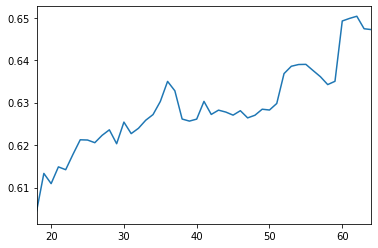

In [300]:
plt.plot(np.arange(17,65,1),scr[17:65])
plt.xlim([18,64])